### Import Library

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, classification_report

# Unlabelled data metrics
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score # SDB-CH

# Labelled data metrics
from sklearn.metrics import adjusted_rand_score # ARI
from sklearn.metrics import normalized_mutual_info_score # NMI
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score # HCV-M

### Import dataset

In [23]:
df = pd.read_csv('Hotel Reservations.csv')

### Melihat bentuk dari dataset

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [25]:
df.head(10)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
5,INN00006,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,2018,9,13,Online,0,0,0,115.00,1,Canceled
6,INN00007,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,2017,10,15,Online,0,0,0,107.55,1,Not_Canceled
7,INN00008,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,2018,12,26,Online,0,0,0,105.61,1,Not_Canceled
8,INN00009,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,2018,7,6,Offline,0,0,0,96.90,1,Not_Canceled
9,INN00010,2,0,0,5,Meal Plan 1,0,Room_Type 4,44,2018,10,18,Online,0,0,0,133.44,3,Not_Canceled


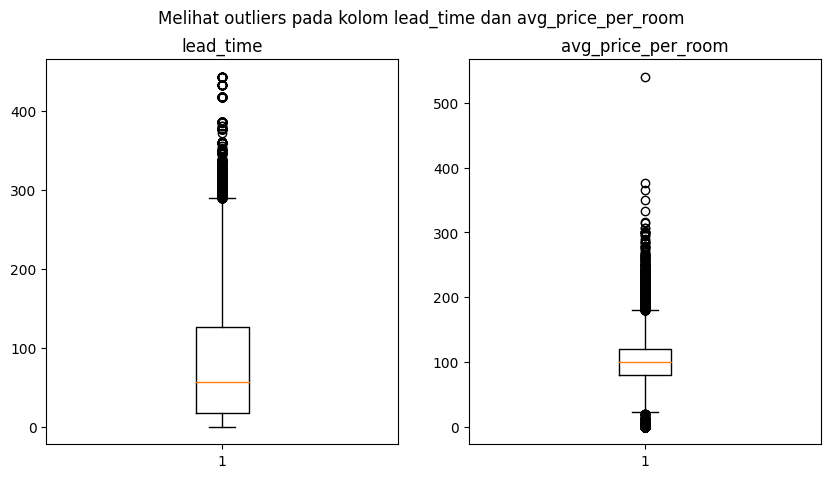

In [26]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('lead_time')
plt.boxplot(df['lead_time'])
plt.subplot(1, 2, 2)
plt.title('avg_price_per_room')
plt.boxplot(df['avg_price_per_room'])
plt.suptitle('Melihat outliers pada kolom lead_time dan avg_price_per_room')
plt.show()

##### Membersihkan Outliers

In [27]:
Q1_lead = df['lead_time'].quantile(0.25)
Q3_lead = df['lead_time'].quantile(0.75)
IQR = Q3_lead - Q1_lead
lower_bound = Q1_lead - 1.5 * IQR
upper_bound = Q3_lead + 1.5 * IQR
df['lead_time'] = df['lead_time'].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

Q1_price = df['avg_price_per_room'].quantile(0.25)
price = df['avg_price_per_room'].quantile(0.75)
IQR = price - Q1_price
lower_bound = Q1_price - 1.5 * IQR
upper_bound = price + 1.5 * IQR
df['avg_price_per_room'] = df['avg_price_per_room'].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

##### Kondisi data setelah di bersihkan

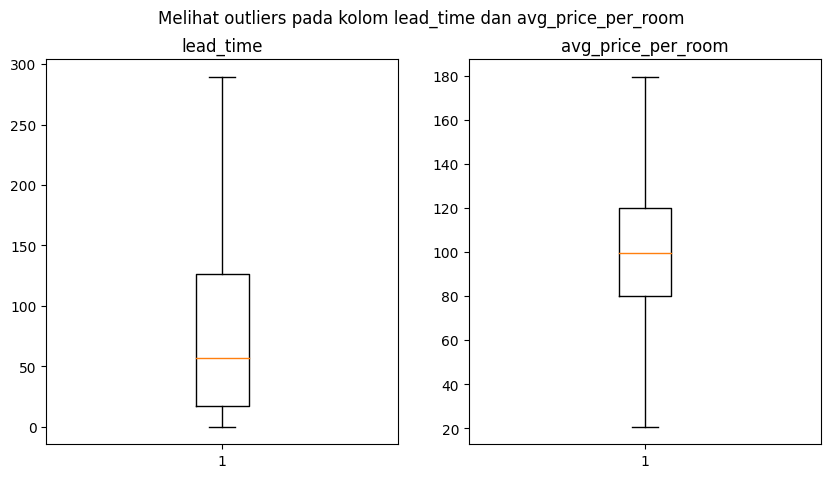

In [28]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('lead_time')
plt.boxplot(df['lead_time'])
plt.subplot(1, 2, 2)
plt.title('avg_price_per_room')
plt.boxplot(df['avg_price_per_room'])
plt.suptitle('Melihat outliers pada kolom lead_time dan avg_price_per_room')
plt.show()

### Melihat korelasi dari setiap feature menggunakan heatmap

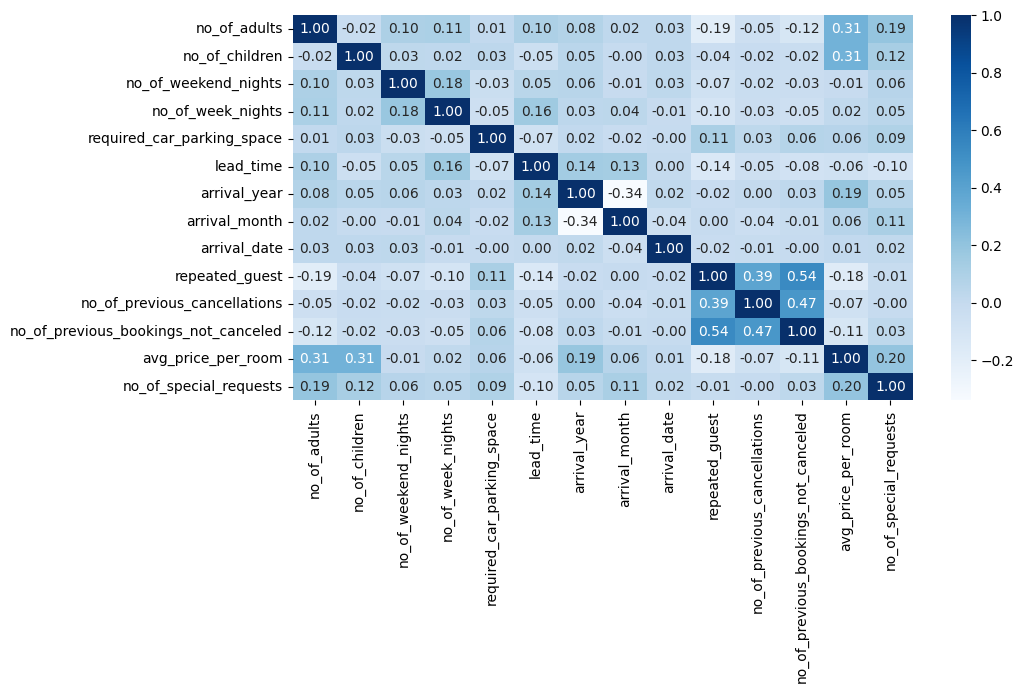

In [29]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(numeric_only=True), cbar=True, annot=True, cmap='Blues', fmt='.2f')
plt.show()

### Data Preprocessing

In [30]:
# Melakukan normalisasi data
min_max_scaler = MinMaxScaler()
df[['lead_time', 'avg_price_per_room']] = min_max_scaler.fit_transform(df[['lead_time', 'avg_price_per_room']])

# Menghapus kolom yang tidak diperlukan
df.drop(['Booking_ID'], axis=1, inplace=True)

# Mengubah data kategorikal menjadi numerikal
col=['type_of_meal_plan','room_type_reserved','booking_status','market_segment_type']
le=LabelEncoder()
for i in col:
    df[i]=le.fit_transform(df[i])

df.head(10)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,0,0,0,0.773748,2017,10,2,3,0,0,0,0.278652,0,1
1,2,0,2,3,3,0,0,0.017271,2018,11,6,4,0,0,0,0.541121,1,1
2,1,0,2,1,0,0,0,0.003454,2018,2,28,4,0,0,0,0.247166,0,0
3,2,0,0,2,0,0,0,0.728843,2018,5,20,4,0,0,0,0.499055,0,0
4,2,0,1,1,3,0,0,0.165803,2018,4,11,4,0,0,0,0.464421,0,0
5,2,0,0,2,1,0,0,1.000000,2018,9,13,4,0,0,0,0.593514,1,0
6,2,0,1,3,0,0,0,0.117444,2017,10,15,4,0,0,0,0.546599,1,1
7,2,0,1,3,0,0,3,0.286701,2018,12,26,4,0,0,0,0.534383,1,1
8,3,0,0,4,0,0,0,0.417962,2018,7,6,3,0,0,0,0.479534,1,1
9,2,0,0,5,0,0,3,0.151986,2018,10,18,4,0,0,0,0.709635,3,1


### A. Supervised Learning

##### A1. Support Vector Classifier

In [55]:
# Memisahkan atribut dan label
X = df[['lead_time', 'avg_price_per_room']]
y = df['booking_status']

# Membagi data menjadi data training dan data testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Membuat model SVC dan melatihnya dengan data training
svm = SVC(kernel='linear', class_weight='balanced')
svm.fit(X_train, y_train)

# Memprediksi data testing
y_pred = svm.predict(X_test)

# Menyimpan nilai Support Vectors & Indexnya
support_vectors = svm.support_vectors_
support_vector_indices = np.where(np.isin(X_train, support_vectors).all(axis=1))

##### A2. Evaluasi Hasil Prediksi

Confusion Matrix SVM

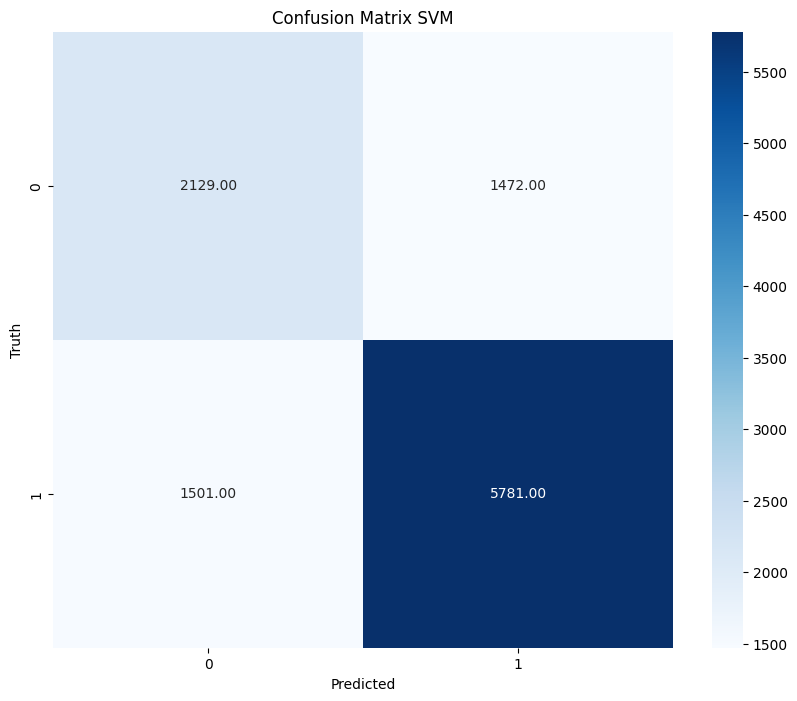

In [56]:
svm_cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,8))
sns.heatmap(svm_cm, annot=True, fmt='.2f', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix SVM')
plt.show()

Classification Report SVM

In [57]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.59      0.59      3601
           1       0.80      0.79      0.80      7282

    accuracy                           0.73     10883
   macro avg       0.69      0.69      0.69     10883
weighted avg       0.73      0.73      0.73     10883



##### A3. Plotting Hasil Prediksi SVM

c:\Users\nabil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


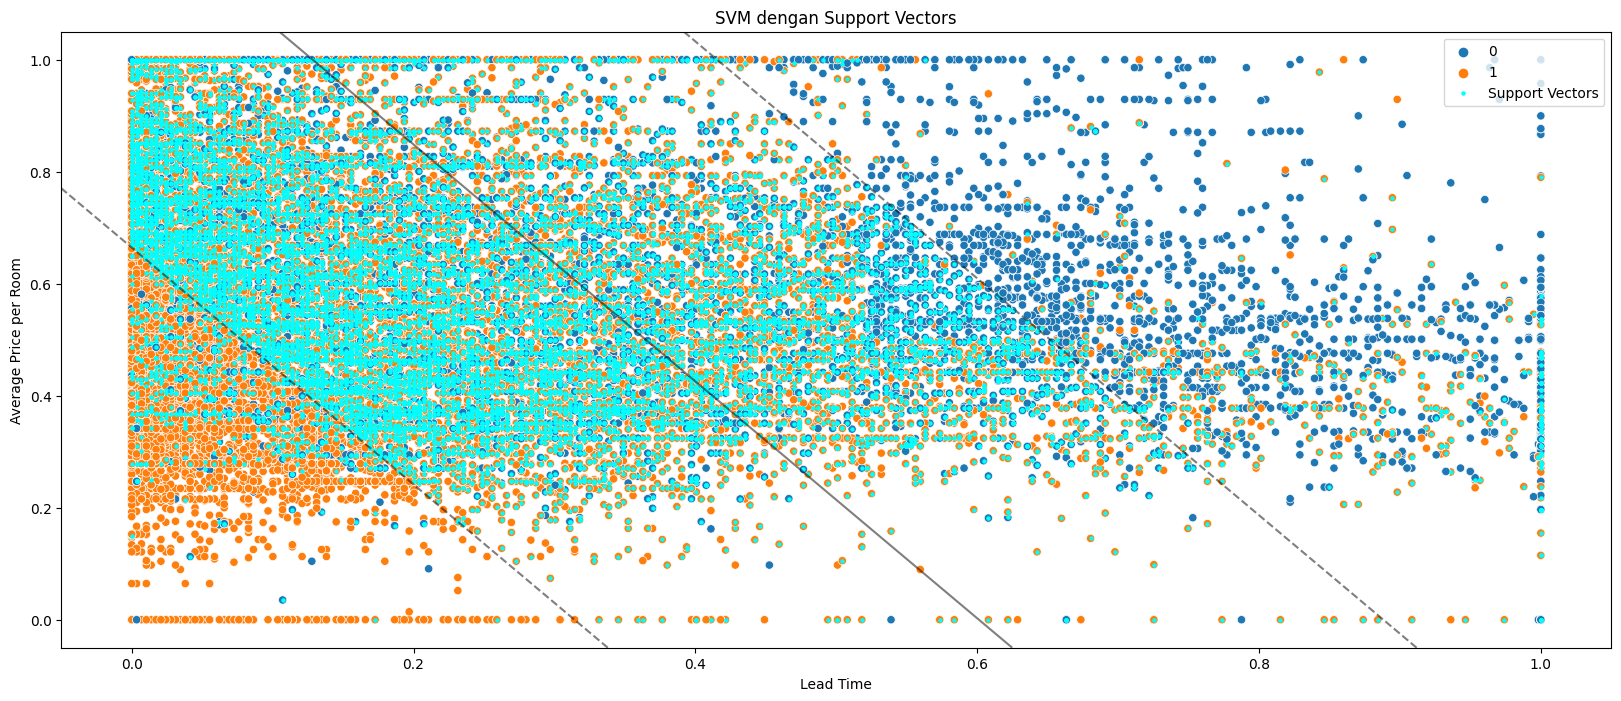

In [58]:
plt.figure(figsize=(20,8))

sns.scatterplot(x='lead_time', y='avg_price_per_room', data=df, hue='booking_status')

# Tampilkan Titik-Titik Support Vectors-nya
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=5, color='cyan', marker='o', label='Support Vectors')

# Buat garis Decision Boundary (Ruang Keputusan)
ax = plt.gca() # gca() = "Get Current Axes"
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Buat sebuah meshgrid untuk evaluasi model
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1]), # Linear Space x
np.linspace(ylim[0], ylim[1])) # Linear Space y
Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()]) # Concatenate
Z = Z.reshape(xx.shape) # Reshape titik agar sesuai dengan sumbu x

# Buat grafik Decision Boundary dan garis Marginnya
ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

plt.xlabel('Lead Time')
plt.ylabel('Average Price per Room')
plt.legend(loc='upper right')
plt.title('SVM dengan Support Vectors')
plt.show()

##### Random Forest Classifier

In [35]:
rfc = RandomForestClassifier(n_estimators=500, random_state=42)

X = df.drop(['booking_status'], axis=1)
y = df['booking_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)


Fitur Penting yang Mempengaruhi Prediksi

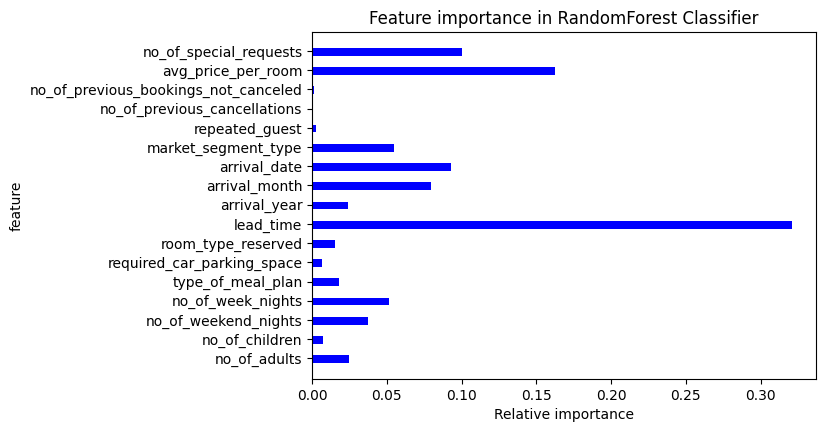

<Figure size 500x500 with 0 Axes>

In [36]:
col = df.drop(['booking_status'], axis=1)

y = rfc.feature_importances_

fig, ax = plt.subplots() 
width = 0.4
ind = np.arange(len(y))

ax.barh(ind, y, width, color='blue')
ax.set_yticks(ind+width/10)
ax.set_yticklabels(col, minor=False)

plt.title('Feature importance in RandomForest Classifier')
plt.xlabel('Relative importance')
plt.ylabel('feature') 
plt.figure(figsize=(5,5))
fig.set_size_inches(6.5, 4.5, forward=True)
plt.show()

Confusion Matrix Random Forest

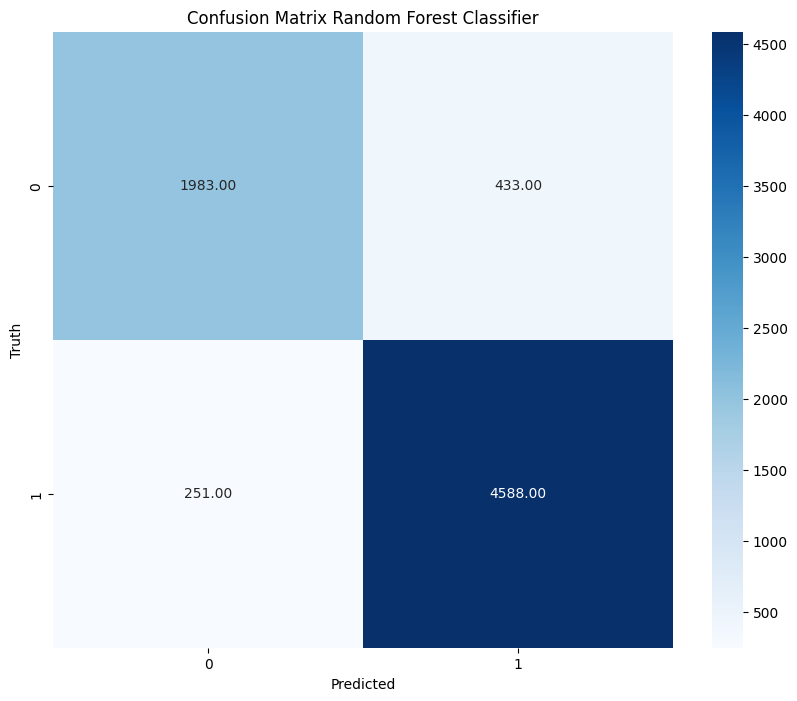

In [37]:
rfc_cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,8))
sns.heatmap(rfc_cm, annot=True, fmt='.2f', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix Random Forest Classifier')
plt.show()

Classification Report Random Forest

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.82      0.85      2416
           1       0.91      0.95      0.93      4839

    accuracy                           0.91      7255
   macro avg       0.90      0.88      0.89      7255
weighted avg       0.91      0.91      0.90      7255



Kesimpulan terkait hasil prediksi Random Forest Classifier:
Random Forest Classifier memiliki akurasi yang lebih baik dibandingkan dengan Support Vector Classifier, hal ini kemungkinan karena kemampuan Random Forest Classifier dalam menampung lebih banyak feature dibandingkan dengan Support Vector Classifier yang menyebabkan Random Forest Classifier lebih baik dalam memprediksi data.

### B. Unsupervised Learning

##### B1. K-Means Clustering

In [82]:
df2 = pd.read_csv('Hotel Reservations.csv')

min_max_scaler = MinMaxScaler()
df2[['lead_time', 'avg_price_per_room']] = min_max_scaler.fit_transform(df2[['lead_time', 'avg_price_per_room']])

# Menghapus kolom yang tidak diperlukan
df2.drop(['Booking_ID'], axis=1, inplace=True)

# Mengubah data kategorikal menjadi numerikal
col=['type_of_meal_plan','room_type_reserved','booking_status','market_segment_type']
le=LabelEncoder()
for i in col:
    df2[i]=le.fit_transform(df2[i])

In [83]:
X = df2[['lead_time', 'avg_price_per_room']]
K = 2 # Diambil dari jumlah target

kmeans = KMeans(n_clusters=K, n_init=10, init='k-means++', random_state=42) 
kmeans.fit(X)

cluster_labels = kmeans.labels_
df2["cluster"] = cluster_labels
centroids = kmeans.cluster_centers_
cluster_mapping = {0: 1, 1: 0}
df2['cluster'] = df2['cluster'].map(cluster_mapping)

##### Evaluasi Hasil Clustering

Tanpa Label Asli

In [84]:
# Silhouette Score
ss_score = silhouette_score(X, df2['cluster'])
print(f"Silhouette Score: {ss_score:.2f}")

# Davies-Bouldin Index
db_index = davies_bouldin_score(X, df2['cluster'])
print(f"Davies-Bouldin Index: {db_index:.2f}")

# Calinski-Harabasz Index
ch_index = calinski_harabasz_score(X, df2['cluster'])
print(f"Calinski-Harabasz Index: {ch_index:.2f}")

Silhouette Score: 0.60
Davies-Bouldin Index: 0.61
Calinski-Harabasz Index: 65659.08


Dengan Label Asli

In [85]:
# Buat crosstab untuk membandingkan cluster labels dengan true labels
cross_tab = pd.crosstab(df2["cluster"], df2["booking_status"])
print("Cross-Tabulation:")
print(cross_tab, "\n")

# Adjusted Rand Index (ARI)
ari = adjusted_rand_score(df2["booking_status"], df2['cluster'])
print(f"Adjusted Rand Index (ARI): {ari:.2f}")

# Normalized Mutual Information (NMI)
nmi = normalized_mutual_info_score(df2['booking_status'], df2['cluster'])
print(f"Normalized Mutual Information (NMI): {nmi:.2f}")

# Fungsi HCV-M
homogeneity = homogeneity_score(df2["booking_status"], df2['cluster'])
completeness = completeness_score(df2["booking_status"], df2['cluster'])
v_measure = v_measure_score(df2["booking_status"], df2['cluster'])
print(f"Homogeneity Score: {homogeneity:.2f}")
print(f"Completeness Score: {completeness:.2f}")
print(f"V-Measure Score: {v_measure:.2f}")

Cross-Tabulation:
booking_status     0      1
cluster                    
0               5766   3165
1               6119  21225 

Adjusted Rand Index (ARI): 0.21
Normalized Mutual Information (NMI): 0.12
Homogeneity Score: 0.11
Completeness Score: 0.13
V-Measure Score: 0.12


##### B3. Plotting Hasil Klasterisasi

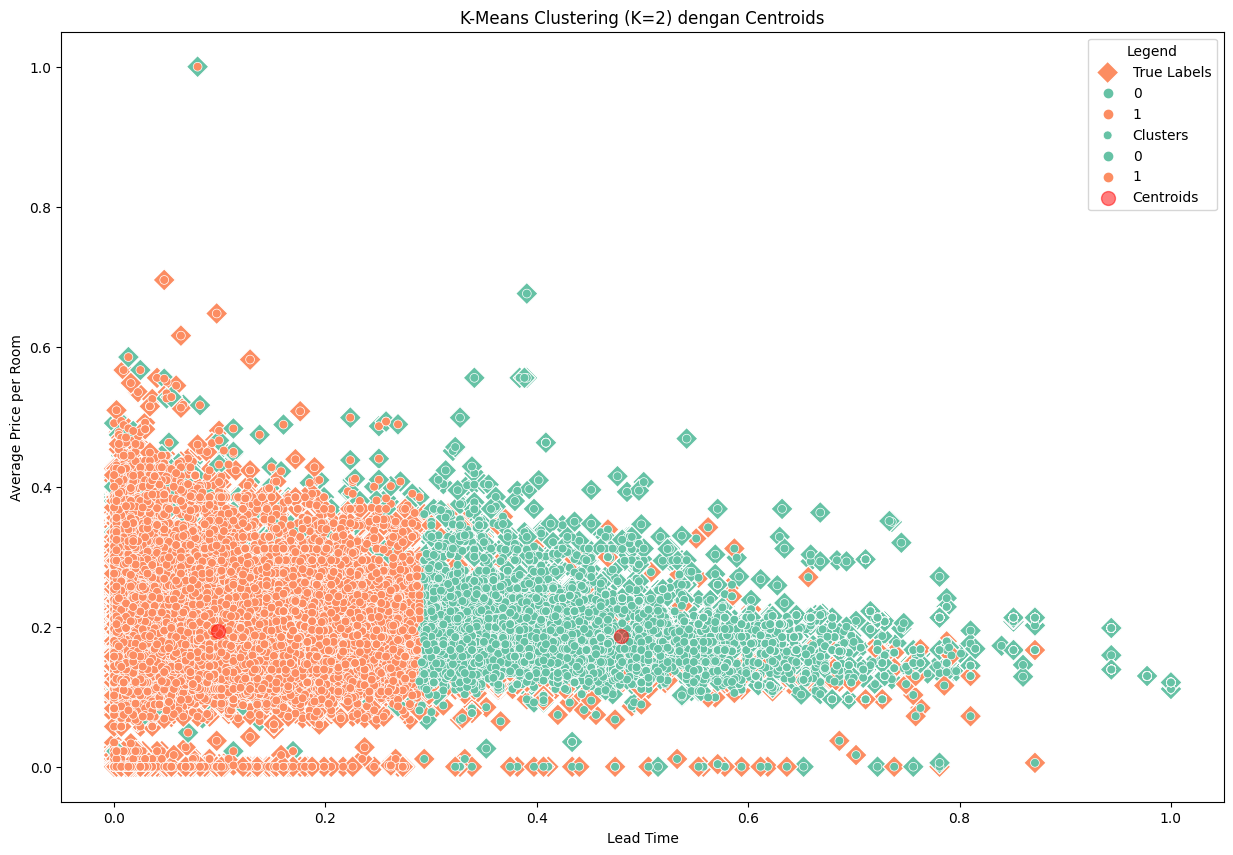

In [86]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=df2, x="lead_time", y="avg_price_per_room", hue="booking_status", palette='Set2', marker="D", s=130, label="True Labels")
sns.scatterplot(data=df2, x="lead_time", y="avg_price_per_room", hue="cluster", palette='Set2', marker="o", s=40, label="Clusters")
plt.scatter(centroids[:, 0], centroids[:, 1], alpha=0.5, c='red', s=100, label='Centroids')
plt.title(f"K-Means Clustering (K={K}) dengan Centroids")
plt.xlabel("Lead Time")
plt.ylabel("Average Price per Room")
plt.legend(title="Legend", loc="upper right")
plt.show()